In [209]:
import pandas as pd

In [210]:
import numpy as np

In [211]:
playerplays = pd.read_csv("player_play.csv")
plays = pd.read_csv("plays.csv")
players = pd.read_csv("players.csv")

In [212]:
df = pd.read_csv("tracking_week_1.csv")

In [213]:
df2 = pd.read_csv("tracking_week_2.csv")
df3 = pd.read_csv("tracking_week_3.csv")
df4 = pd.read_csv("tracking_week_4.csv")
df5 = pd.read_csv("tracking_week_5.csv")
df6 = pd.read_csv("tracking_week_6.csv")
df7 = pd.read_csv("tracking_week_7.csv")
df8 = pd.read_csv("tracking_week_8.csv")
df9 = pd.read_csv("tracking_week_9.csv")

In [214]:
motionplayers = playerplays[['gameId','playId','motionSinceLineset']][playerplays['motionSinceLineset']==True]

In [215]:
motionplays = pd.merge(
    motionplayers,
    plays[['gameId','playId','passResult']],
    how = "left",
    on = ['gameId','playId']
)

In [216]:
motionplays = motionplays[motionplays['passResult'].notna()]

In [217]:
routeRunners = pd.merge(
    playerplays[['gameId','playId','nflId','motionSinceLineset','inMotionAtBallSnap','wasRunningRoute','wasTargettedReceiver']][playerplays['wasRunningRoute']==True],
    plays[['gameId','playId','down','yardsToGo','offenseFormation','receiverAlignment','pff_passCoverage','absoluteYardlineNumber',]],
    how = "left",
    left_on = ['gameId','playId'],
    right_on = ['gameId','playId']
)


In [218]:
motionRunners = routeRunners.merge(
    motionplays[['gameId', 'playId']].drop_duplicates(), 
    on=['gameId', 'playId'], 
    how='inner'
)

In [219]:
dfs = [df, df2, df3, df4, df5, df6, df7, df8, df9]

df = pd.concat(dfs, axis=0, ignore_index=True)

In [220]:
snappositions = df[['gameId','playId','nflId','y']][df['frameType']=="SNAP"]

In [221]:
snappositions

,gameId,playId,nflId,y
113,2022091200,64,35459.0,29.430000
276,2022091200,64,39987.0,23.860000
439,2022091200,64,41310.0,22.210000
602,2022091200,64,42393.0,13.410000
765,2022091200,64,42403.0,17.630000
...,...,...,...,...
59327193,2022110300,3579,54468.0,24.370000
59327234,2022110300,3579,54502.0,33.370000
59327275,2022110300,3579,54540.0,30.430000
59327316,2022110300,3579,54663.0,33.760000


In [222]:
motionRunners = pd.merge(
    motionRunners,
    snappositions,
    how = "left",
    on = ['gameId','playId','nflId']
)

In [223]:
motionRunners

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
0,2022090800,56,42489,True,False,1.0,1,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65
1,2022090800,56,44985,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,18.20
2,2022090800,56,47879,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,34.37
3,2022090800,56,52536,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,8.25
4,2022090800,212,42818,False,False,1.0,0,2,9,SHOTGUN,2x2,Cover-1,44,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,2022110700,2496,54476,False,False,1.0,1,3,6,SHOTGUN,2x2,Cover-6 Right,51,16.00
16432,2022110700,3059,43415,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,10.07
16433,2022110700,3059,52500,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,44.49
16434,2022110700,3059,52609,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,36.29


In [224]:
weekone = motionRunners[motionRunners['y'].notna()]

In [225]:
weekone[weekone['motionSinceLineset'].isna()]

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
1913,2022091110,673,40011,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,32.52
1914,2022091110,673,47839,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,26.99
1916,2022091110,673,53591,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,31.20
1917,2022091110,673,54519,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,14.57
2097,2022091111,232,40024,NaN,False,1.0,0,1,10,SINGLEBACK,3x1,Cover-2,84,22.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16387,2022110700,588,54604,NaN,NaN,1.0,0,3,8,SHOTGUN,3x1,Cover-3,63,31.49
16403,2022110700,1577,47852,NaN,False,1.0,0,2,10,EMPTY,3x2,Red Zone,22,16.56
16404,2022110700,1577,52500,NaN,True,1.0,0,2,10,EMPTY,3x2,Red Zone,22,29.32
16405,2022110700,1577,52609,NaN,False,1.0,0,2,10,EMPTY,3x2,Red Zone,22,35.98


In [226]:
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)

In [227]:
linecoords = pd.read_csv("linecoods.csv")

In [228]:
linecoords2 = pd.read_csv("linecoods2.csv")

In [229]:
linecoords = pd.concat([linecoords,linecoords2])

In [230]:
linecoords3 = pd.read_csv("linecoods3.csv")
linecoords4 = pd.read_csv("linecoods4.csv")
linecoords5 = pd.read_csv("linecoods5.csv")
linecoords6 = pd.read_csv("linecoods6.csv")
linecoords7 = pd.read_csv("linecoods7.csv")
linecoords8 = pd.read_csv("linecoods8.csv")
linecoords9 = pd.read_csv("linecoods9.csv")

In [231]:
linecoords = pd.concat([linecoords,linecoords3,linecoords4,linecoords5,linecoords6,linecoords7,linecoords8,linecoords9],)

In [232]:
weekone = pd.merge(
    weekone,
    linecoords[['gameId','playId','topOfLine','bottomOfLine']],
    how = "left",
    on = ['gameId','playId']
    )

In [233]:
weekone = pd.merge(
    weekone,
    players[['nflId','position']]
)

In [236]:
weekone

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y,topOfLine,bottomOfLine,position
0,2022090800,56,42489,True,False,1.0,1,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65,32.87,26.35,WR
1,2022090800,550,42489,True,True,1.0,0,2,3,SHOTGUN,2x2,Cover-3 Seam,94,38.71,32.51,25.85,WR
2,2022090800,569,42489,True,True,1.0,1,3,4,SHOTGUN,2x2,Cover-3,95,34.99,32.57,25.86,WR
3,2022090800,617,42489,False,False,1.0,0,1,10,SHOTGUN,2x1,Cover-3,74,34.55,26.68,20.30,WR
4,2022090800,1030,42489,False,False,1.0,0,3,2,SHOTGUN,2x2,Cover-3,50,9.36,27.25,20.58,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,2022110605,1593,52488,False,False,1.0,0,2,8,SHOTGUN,2x1,Cover 6-Left,72,34.70,29.86,23.86,WR
16432,2022110605,3434,52488,True,True,1.0,0,2,10,SINGLEBACK,2x2,Cover-3,64,37.93,32.89,26.65,WR
16433,2022110700,1047,33130,False,False,1.0,1,3,9,SHOTGUN,2x2,Quarters,65,9.74,34.45,26.77,WR
16434,2022110700,2096,33130,False,False,1.0,0,1,20,PISTOL,3x1,Cover-2,45,20.19,32.90,25.32,WR


In [648]:
safetyPositions = pd.read_csv("safetyPositions")

In [650]:
weekone = pd.merge(
    weekone,
    safetyPositions,
    how = "left",
    on = ['gameId','playId']
)

In [235]:
weekone = weekone[weekone['topOfLine'].notna()]

In [653]:
one = pd.DataFrame(columns=[
    'gameId', 'playId', 'down', 'yardsToGo', 'offenseFormation', 
    'pff_passCoverage', 'absoluteYardlineNumber', 'receiverAlignment',
    'firstY', 'secondY', 'thirdY', 'fourthY', 'fifthY', 'sixthY', 'safetyTop','safetyBottom', 'rbPosition',
    'aboveLine', 'belowLine','motionReceiver', 'motionCluster', 'inMotionAtBallSnap', 
    'targetedReceiver', 'maxSeparationReceiver', 'nflId'
])

for _, i in weekone.iterrows():
    inone = ((one['gameId'] == i['gameId']) & (one['playId'] == i['playId'])).any()
    
    if not inone:
        play = weekone[(weekone['gameId'] == i['gameId']) & 
                       (weekone['playId'] == i['playId'])]
        play = play.sort_values(by='y', ascending=False)
        motion_players = play[play['motionSinceLineset']]  # Get motion players

        for _, motion_player in motion_players.iterrows():
            thisplay = [
                i['gameId'],
                i['playId'],
                i['down'], 
                i['yardsToGo'], 
                i['offenseFormation'],
                i['pff_passCoverage'], 
                i['absoluteYardlineNumber'],
                i['receiverAlignment']
            ]

            motionrec = 0
            targetrec = 0
            motionindex = 1
            targetindex = 1
            aboveline = 0
            belowline = 0
            moving = False
            rbindex = 0
            for _, j in play.iterrows():
                thisplay.append(j['y'])
                if j['y'] > j['topOfLine']:
                    aboveline += 1
                elif j['y'] < j['bottomOfLine']:
                    belowline += 1
                if j['motionSinceLineset']:
                    if j['nflId'] == motion_player['nflId']:  # Focus on specific motion player
                        motionrec = motionindex
                        if j['inMotionAtBallSnap']:
                            moving = True
                if j['position'] == 'RB':
                    rbindex = targetindex
                if j['wasTargettedReceiver']:
                    targetrec = targetindex
                motionindex += 1
                targetindex += 1

            while len(thisplay) < 14:
                thisplay.append(0)

            thisplay.extend([
                i['safetyTop'],
                i['safetyBottom'],
                rbindex,
                aboveline,
                belowline,
                motionrec,
                0,  # Add motion cluster
                moving,
                targetrec,
                0,  # Find max separation receiver
                motion_player['nflId']
            ])
            
            new_row = pd.DataFrame([thisplay], columns=one.columns)
            one = pd.concat([one, new_row], ignore_index=True)


C:\Users\bhaga\AppData\Local\Temp\ipykernel_30028\4180535748.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one = pd.concat([one, new_row], ignore_index=True)


In [654]:
one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,safetyBottom,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,2.0,0,2,2,1,0,False,1,0,42489
1,2022090800,550,2,3,SHOTGUN,Cover-3 Seam,94,2x2,38.71,34.35,...,1.0,3,2,2,1,0,True,0,0,42489
2,2022090800,569,3,4,SHOTGUN,Cover-3,95,2x2,34.99,34.61,...,1.0,3,2,2,1,0,True,1,0,42489
3,2022090800,617,1,10,SHOTGUN,Cover-3,74,2x1,34.55,25.55,...,1.0,0,1,1,3,0,True,3,0,44985
4,2022090800,1030,3,2,SHOTGUN,Cover-3,50,2x2,42.03,26.77,...,2.0,3,1,2,2,0,True,1,0,44985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,2022092513,1036,1,10,SHOTGUN,Cover-2,50,2x2,42.48,30.85,...,1.0,3,2,2,1,0,False,4,0,52766
3913,2022100600,3966,3,4,SHOTGUN,Cover-1,97,2x2,36.05,32.09,...,1.0,2,1,2,1,0,True,4,0,52454
3914,2022102304,80,1,10,SINGLEBACK,Cover-3,73,3x1,34.80,9.99,...,1.0,0,1,1,1,0,False,1,0,47954
3915,2022102304,80,1,10,SINGLEBACK,Cover-3,73,3x1,34.80,9.99,...,1.0,0,1,1,2,0,False,1,0,44003


In [239]:
clusters = pd.read_csv('clusters.csv')

In [240]:
clusters[['gameId','playId','nflId','cluster']]

,gameId,playId,nflId,cluster
0,2022090800,56,42489.0,1.0
1,2022090800,80,47857.0,0.0
2,2022090800,212,47879.0,6.0
3,2022090800,236,52536.0,1.0
4,2022090800,299,44881.0,5.0
...,...,...,...,...
4895,2022110700,2182,33130.0,2.0
4896,2022110700,2261,43362.0,3.0
4897,2022110700,2307,43362.0,3.0
4898,2022110700,2496,44879.0,3.0


In [241]:
clusters['cluster'].value_counts()

cluster
6.0    1147
3.0     834
2.0     763
1.0     661
5.0     629
4.0     543
0.0     323
Name: count, dtype: int64

In [655]:
week_one = pd.merge(
    one,
    clusters[['gameId','playId','nflId','cluster']],
    how = "left",
    on = ['gameId','playId', 'nflId']
)

In [656]:
week_one['motionCluster'] = week_one['cluster']

In [657]:
week_one[week_one['motionCluster'].isna()]

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster
8,2022090800,2572,2,9,SHOTGUN,Cover-3 Seam,76,2x2,43.19,36.45,...,3,2,0,5,NaN,True,3,0,53079,NaN
14,2022090800,2934,1,10,SHOTGUN,Cover-3 Seam,51,2x1,44.25,32.21,...,3,1,2,4,NaN,False,3,0,44985,NaN
19,2022091900,922,4,1,SHOTGUN,Cover-3,41,3x1,37.79,36.30,...,3,2,1,2,NaN,False,3,0,54613,NaN
30,2022092503,994,3,9,SHOTGUN,Cover-0,73,2x2,39.40,38.51,...,3,2,2,3,NaN,False,3,0,47857,NaN
31,2022092503,1111,1,9,I_FORM,Red Zone,19,2x1,34.40,27.70,...,4,2,1,3,NaN,False,0,0,53079,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,2022091810,2435,2,16,EMPTY,Cover-2,91,3x2,46.73,37.95,...,1,2,3,5,NaN,False,3,0,52526,NaN
3893,2022100600,3123,2,10,SHOTGUN,Cover-3 Seam,76,3x1,45.02,36.37,...,4,3,1,5,NaN,False,4,0,46109,NaN
3897,2022102307,2287,1,10,SHOTGUN,Cover-1,71,2x2,41.79,30.97,...,3,1,2,2,NaN,True,5,0,48096,NaN
3902,2022103000,1395,1,10,SHOTGUN,Cover-3,85,3x1,44.42,32.15,...,2,1,3,2,NaN,True,1,0,42358,NaN


In [658]:
week_one = week_one.drop(columns = ['cluster', 'nflId'])

In [659]:
week_one = week_one.dropna(subset=['motionCluster'])

In [662]:
week_one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,safetyTop,safetyBottom,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,1.0,2.0,0,2,2,1,1.0,False,1,0
2,2022090800,569,3,4,SHOTGUN,Cover-3,95,2x2,34.99,34.61,...,1.0,1.0,3,2,2,1,2.0,True,1,0
3,2022090800,617,1,10,SHOTGUN,Cover-3,74,2x1,34.55,25.55,...,2.0,1.0,0,1,1,3,2.0,True,3,0
4,2022090800,1030,3,2,SHOTGUN,Cover-3,50,2x2,42.03,26.77,...,0.0,2.0,3,1,2,2,0.0,True,1,0
6,2022090800,2184,1,10,SHOTGUN,Cover-3 Seam,32,2x2,43.64,34.90,...,1.0,1.0,3,2,2,5,5.0,False,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,2022103000,3766,1,10,SHOTGUN,Cover-1,77,2x2,32.69,30.58,...,0.0,2.0,3,2,3,4,6.0,False,1,0
3911,2022091200,3216,3,2,SINGLEBACK,Cover-3,40,3x1,33.99,29.91,...,1.0,1.0,2,1,2,4,5.0,True,4,0
3912,2022092513,1036,1,10,SHOTGUN,Cover-2,50,2x2,42.48,30.85,...,1.0,1.0,3,2,2,1,1.0,False,4,0
3913,2022100600,3966,3,4,SHOTGUN,Cover-1,97,2x2,36.05,32.09,...,1.0,1.0,2,1,2,1,1.0,True,4,0


In [661]:
week_one = week_one[week_one['targetedReceiver']!=0]

In [671]:
week_one['safetyBottom'] = week_one['safetyBottom'].fillna(0)
week_one['safetyTop'] = week_one['safetyTop'].fillna(0)


C:\Users\bhaga\AppData\Local\Temp\ipykernel_30028\1490127179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one['safetyBottom'] = week_one['safetyBottom'].fillna(0)
C:\Users\bhaga\AppData\Local\Temp\ipykernel_30028\1490127179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one['safetyTop'] = week_one['safetyTop'].fillna(0)


In [320]:
import seaborn as sns
import matplotlib as plt

Modeling

In [51]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','maxSeparationReceiver'])

In [732]:
y = week_one['targetedReceiver']

In [ ]:
X = pd.get_dummies(X_original, columns=['down','offenseFormation','receiverAlignment','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
#X = pd.get_dummies(X, columns=['down','offenseFormation','receiverAlignment','pff_passCoverage','motionReceiver'])

In [733]:
y = y.astype("category")

Random Forest

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [672]:
X = weekone

In [705]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','receiverAlignment','pff_passCoverage','maxSeparationReceiver', 'sixthY','safetyBottom'])
X = pd.get_dummies(X_original, columns=['down','rbPosition','offenseFormation','motionReceiver','motionCluster'])

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [707]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced_subsample")

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [318]:
feature_importances = rf.feature_importances_
important = pd.DataFrame()
for name, importance in zip(X.columns, feature_importances):
    important = pd.concat([important, pd.DataFrame({'Name': [name], 'Importance': [importance]})], ignore_index=True)

important = important.sort_values(by='Importance', ascending=False)

In [708]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3354632587859425
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.33      0.35       120
           1       0.35      0.36      0.36       144
           2       0.34      0.36      0.35       145
           3       0.35      0.38      0.37       130
           4       0.23      0.18      0.20        87

    accuracy                           0.34       626
   macro avg       0.33      0.32      0.32       626
weighted avg       0.33      0.34      0.33       626



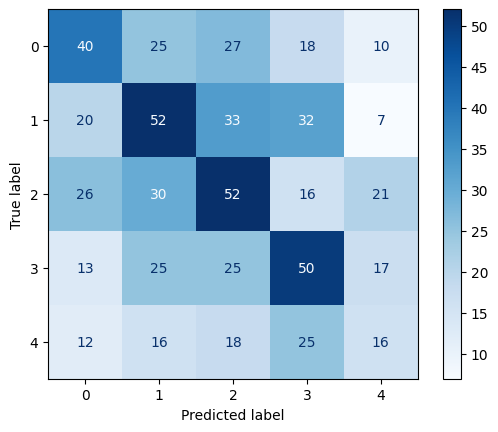

In [709]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

In [710]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],          # Number of trees in the forest.
    'max_depth': [None, 10, 20, 30],         
    'max_features': ['sqrt', 'log2'],       
    'bootstrap': [True, False]              
}

In [711]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=10, n_estimators=150)


In [712]:
model_grid = RandomForestClassifier(max_depth=10, 
                                    n_estimators=150,
                                    random_state=42) 
model_grid.fit(X_train, y_train) 

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [713]:
y_pred_grid = model_grid.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print(classification_report(y_pred_grid, y_test)) 

Accuracy: 0.34345047923322686
              precision    recall  f1-score   support

           0       0.31      0.35      0.33       107
           1       0.42      0.36      0.39       169
           2       0.43      0.33      0.38       190
           3       0.33      0.37      0.35       117
           4       0.13      0.26      0.17        43

    accuracy                           0.34       626
   macro avg       0.32      0.33      0.32       626
weighted avg       0.37      0.34      0.35       626



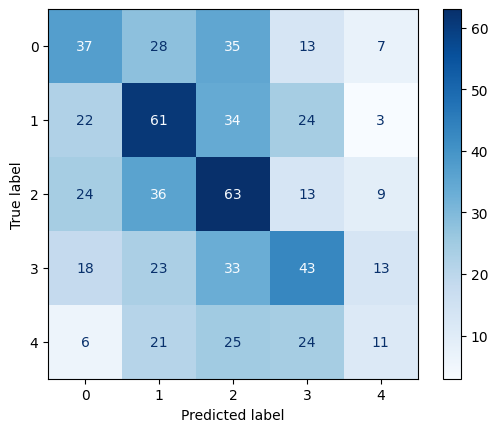

In [714]:
cm_best = confusion_matrix(y_test, y_pred_grid)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

Logistic Regression

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [696]:
X_original = week_one.drop(columns=['down','offenseFormation','gameId','playId','receiverAlignment','targetedReceiver','maxSeparationReceiver','absoluteYardlineNumber','sixthY','safetyTop','safetyBottom'])
X = pd.get_dummies(X_original, columns=['rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [697]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [698]:
y_pred = log_model.predict(X_test)

In [418]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': log_model.coef_[0]  # For binary classification, use model.coef_
})

# For multiclass classification, handle multiple sets of coefficients
if log_model.coef_.shape[0] > 1:
    for i, class_coef in enumerate(log_model.coef_):
        feature_importances[f'Class_{i}'] = class_coef

# Sort by absolute importance for a given class (optional)
feature_importances['Absolute_Importance'] = feature_importances['Importance'].abs()
feature_importances = feature_importances.sort_values(by='Absolute_Importance', ascending=False)


In [419]:
feature_importances.head(60)

,Feature,Importance,Class_0,Class_1,Class_2,Class_3,Class_4,Absolute_Importance
31,pff_passCoverage_Cover-1 Double,-0.654737,-0.654737,0.221999,-0.271681,0.435481,0.268937,0.654737
29,pff_passCoverage_Cover-0,0.602820,0.602820,-0.116141,-0.289845,-0.154405,-0.042429,0.602820
44,motionReceiver_1,0.572716,0.572716,-0.135265,-0.285613,-0.167534,0.015696,0.572716
37,pff_passCoverage_Cover-3 Seam,0.436204,0.436204,-0.202719,-0.135290,-0.036329,-0.061866,0.436204
20,rbPosition_0,0.387923,0.387923,0.466990,0.196055,0.268680,-1.319648,0.387923
28,pff_passCoverage_Cover 6-Left,0.309677,0.309677,-0.153500,-0.212594,0.182458,-0.126040,0.309677
34,pff_passCoverage_Cover-3 Cloud Left,-0.283228,-0.283228,0.023775,0.338212,-0.000173,-0.078585,0.283228
35,pff_passCoverage_Cover-3 Cloud Right,-0.272212,-0.272212,0.150175,-0.259262,0.176316,0.204983,0.272212
38,pff_passCoverage_Cover-6 Right,0.265824,0.265824,-0.255828,0.072890,-0.083016,0.000130,0.265824
12,down_4,0.247466,0.247466,0.283065,-0.003582,-0.641741,0.114793,0.247466


In [699]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3194888178913738
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.27      0.30       120
           1       0.34      0.41      0.37       144
           2       0.28      0.32      0.29       145
           3       0.37      0.37      0.37       130
           4       0.24      0.17      0.20        87

    accuracy                           0.32       626
   macro avg       0.31      0.31      0.31       626
weighted avg       0.32      0.32      0.32       626



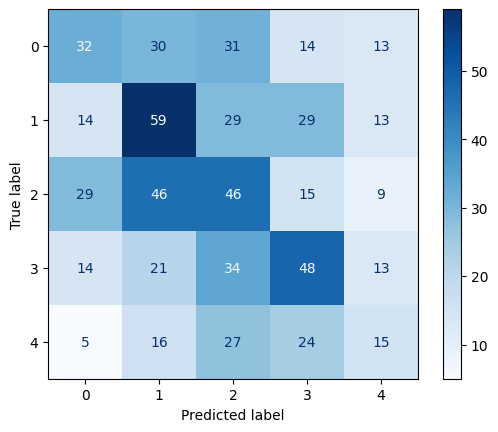

In [700]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

SVM

In [105]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [724]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','maxSeparationReceiver', 'sixthY','safetyTop'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
X = X.drop(columns=['receiverAlignment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [725]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [726]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.21884984025559107
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.22      0.65      0.33       144
           2       0.22      0.30      0.26       145
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00        87

    accuracy                           0.22       626
   macro avg       0.09      0.19      0.12       626
weighted avg       0.10      0.22      0.14       626



c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

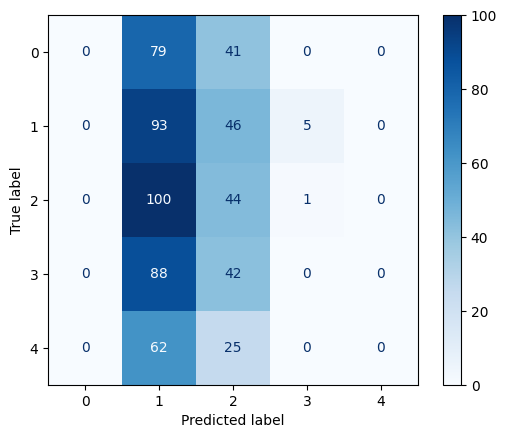

In [727]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [830]:
X_original = week_one.drop(columns=['gameId','playId','down','offenseFormation','motionReceiver','targetedReceiver','pff_passCoverage','maxSeparationReceiver'])
X = pd.get_dummies(X_original, columns=['rbPosition','motionCluster'])
X = X.drop(columns=['receiverAlignment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [831]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf', 'linear']
}

In [832]:
grid_search = GridSearchCV(SVC(decision_function_shape='ovr', random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.27840000000000004


In [445]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(grid_search, X_test, y_test, scoring='accuracy', n_repeats=30, random_state=42)

importances = perm_importance.importances_mean
stds = perm_importance.importances_std
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances,
    'StdDev': stds
}).sort_values(by='Importance', ascending=False)

In [446]:
importance_df

,Feature,Importance,StdDev
1,absoluteYardlineNumber,3.008520e-02,0.014091
0,yardsToGo,2.646432e-02,0.008016
6,fifthY,2.614483e-02,0.012315
5,fourthY,2.550586e-02,0.011071
2,firstY,2.039404e-02,0.013465
4,thirdY,9.478168e-03,0.011925
10,inMotionAtBallSnap,2.875399e-03,0.002454
3,secondY,2.236422e-03,0.010496
11,rbPosition_0,2.236422e-03,0.001405
15,rbPosition_4,1.331203e-03,0.001098


In [833]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.2731629392971246
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.25      0.23       120
           1       0.32      0.38      0.35       144
           2       0.29      0.28      0.28       145
           3       0.28      0.25      0.26       130
           4       0.23      0.15      0.18        87

    accuracy                           0.27       626
   macro avg       0.27      0.26      0.26       626
weighted avg       0.27      0.27      0.27       626



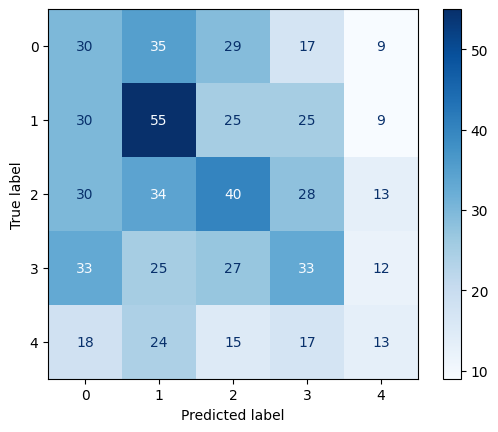

In [834]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

Neural Network

In [117]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [787]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','receiverAlignment','maxSeparationReceiver','sixthY'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])

In [734]:
y = y.cat.codes

In [788]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [789]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [790]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [791]:
tf.random.set_seed(42)
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2244 - loss: 1.7033 - val_accuracy: 0.2440 - val_loss: 1.5905
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2810 - loss: 1.5762 - val_accuracy: 0.2620 - val_loss: 1.5704
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3127 - loss: 1.5483 - val_accuracy: 0.2780 - val_loss: 1.5546
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3158 - loss: 1.5165 - val_accuracy: 0.2940 - val_loss: 1.5449
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3389 - loss: 1.4886 - val_accuracy: 0.2840 - val_loss: 1.5436
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3366 - loss: 1.4831 - val_accuracy: 0.2820 - val_loss: 1.5400
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.4815 - val_accuracy: 0.2800 - val_loss: 1.5378
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3552 - loss: 1.4459 - val_accuracy: 0.2960 - val_loss:

In [792]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.30


XGBoost

In [823]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','pff_passCoverage','receiverAlignment','maxSeparationReceiver','sixthY','safetyTop'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','motionReceiver','motionCluster'])

In [824]:
bool_cols = ['yardsToGo', 'absoluteYardlineNumber', 'inMotionAtBallSnap', 'fifthY', 'aboveLine','belowLine']  # Add other boolean columns as needed
X[bool_cols] = X[bool_cols].astype(int)

In [535]:
from sklearn.preprocessing import LabelEncoder

In [795]:
y = week_one['targetedReceiver']
y = y.astype("category")
y = y.cat.codes

In [825]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [488]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [797]:
class_counts = y_train.value_counts()
scale_pos_weight = class_counts.max() / class_counts.min()

In [827]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='merror',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    gamma=0, 
    subsample=0.8,
    colsample_bytree=0.8,
    random_state = 42
)

model.fit(X_train, y_train)

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:30:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [816]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [828]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Testing Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.32      0.31       120
           1       0.38      0.40      0.39       144
           2       0.37      0.39      0.38       145
           3       0.32      0.31      0.31       130
           4       0.27      0.22      0.24        87

    accuracy                           0.34       626
   macro avg       0.33      0.32      0.33       626
weighted avg       0.33      0.34      0.33       626



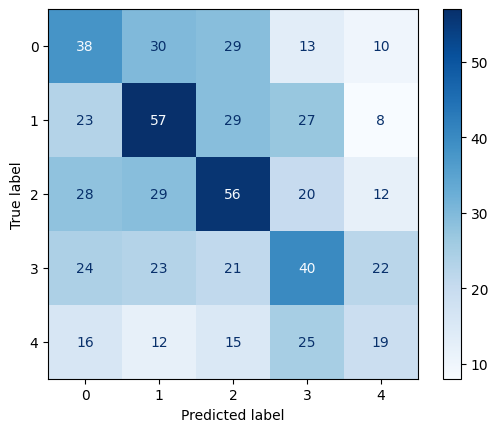

In [829]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')